<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_5_Python_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Uploading ZIP File
from google.colab import files

uploaded = files.upload()

Saving wine+quality.zip to wine+quality.zip


In [3]:
# Extracting ZIP File
import zipfile
import os

zip_file_name = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall("wine_data")

os.listdir("wine_data")

['winequality.names', 'winequality-white.csv', 'winequality-red.csv']

In [5]:
import os

for root, dirs, files in os.walk("wine_data"):
    for file in files:
        print(os.path.join(root, file))

wine_data/winequality.names
wine_data/winequality-white.csv
wine_data/winequality-red.csv


In [17]:
# Dataset Overview
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [18]:
# Class Counts
df['class'].value_counts()

,count
class,
class_0,744
class_1,638
class_2,217


In [21]:
# Handle Missing Values
df.isnull().sum()

df.fillna(df.mean(numeric_only=True), inplace=True)

In [22]:
# Separating Features and Target
X = df.drop('class', axis=1)
y = df['class']

In [23]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

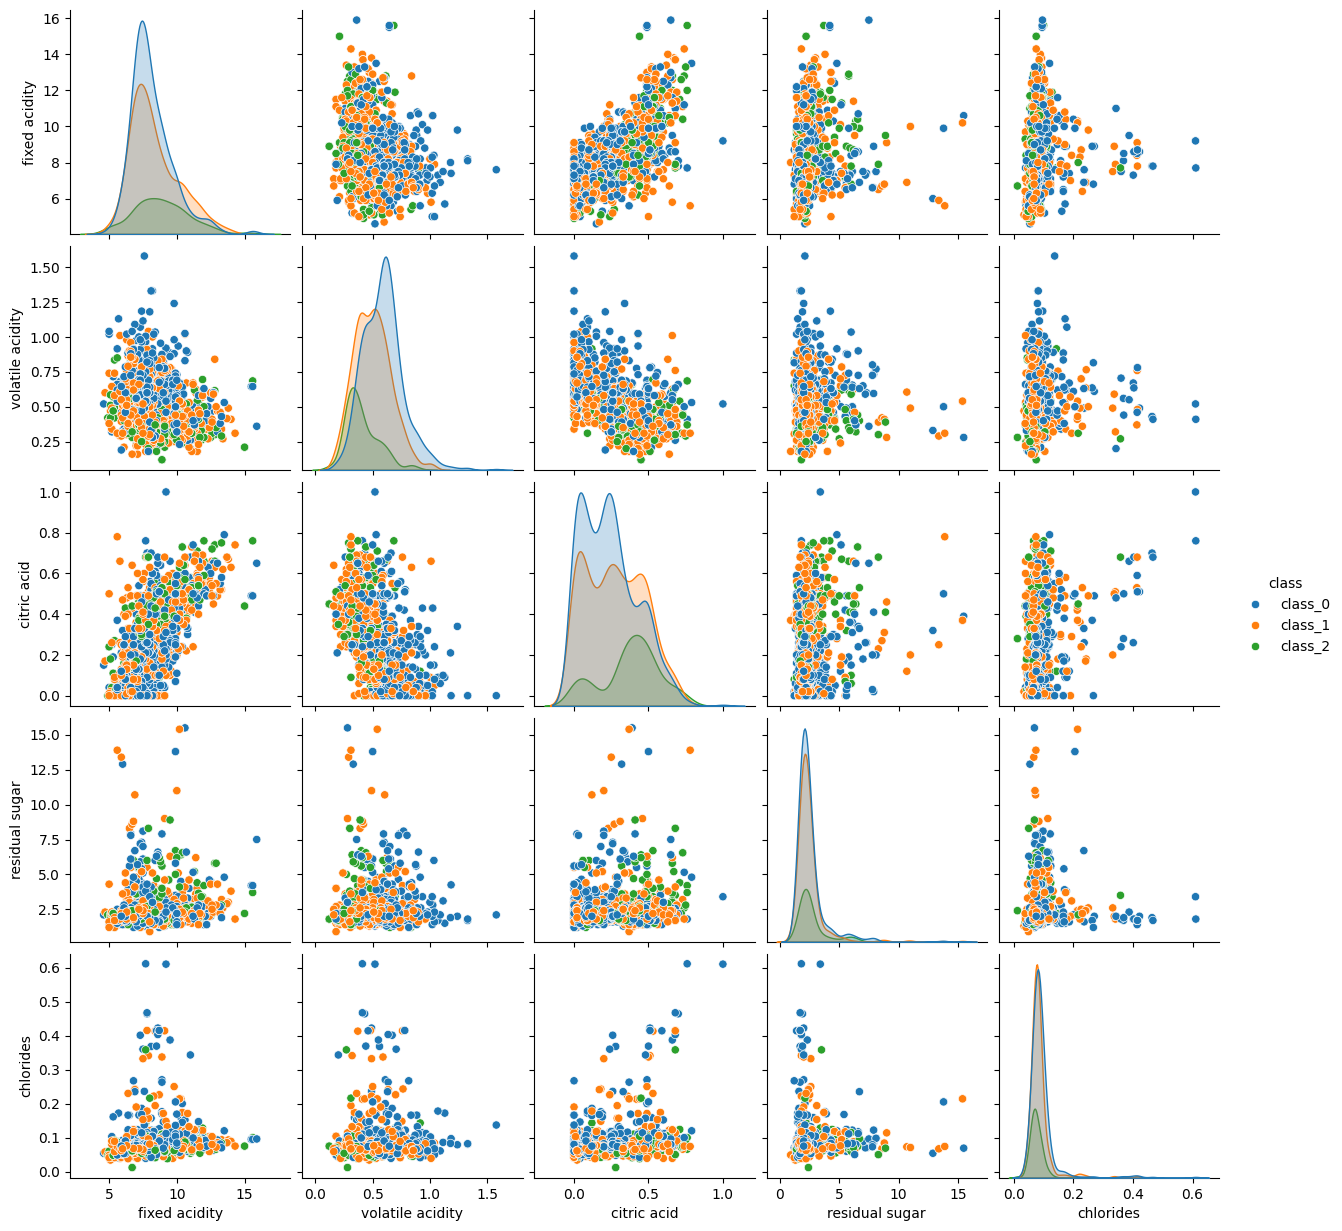

In [24]:
# Pairplot colored by class
import seaborn as sns
import matplotlib.pyplot as plt

features = X.columns[:5]  # limit to avoid overload
sns.pairplot(df[features.tolist() + ['class']], hue='class')
plt.show()

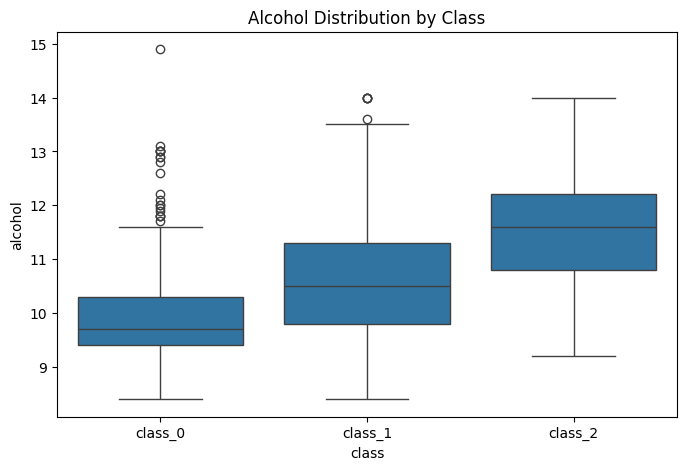

In [25]:
# Boxplot (alcohol grouped by class)
plt.figure(figsize=(8,5))
sns.boxplot(x='class', y='alcohol', data=df)
plt.title("Alcohol Distribution by Class")
plt.show()

In [28]:
# Model Building
# Trainning regression-based mode
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [30]:
# Making predictions
y_pred = model.predict(X_test)

# Model Evaluation
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.640625

In [31]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     class_0       0.69      0.83      0.75       149
     class_1       0.56      0.53      0.55       128
     class_2       0.67      0.33      0.44        43

    accuracy                           0.64       320
   macro avg       0.64      0.56      0.58       320
weighted avg       0.64      0.64      0.63       320

